In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!cd /content/drive/MyDrive/StrokePrediction

# **Load Libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix ,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# **Data Exploration**

In [4]:
df = pd.read_csv('/content/drive/MyDrive/StrokePrediction/healthcare-dataset-stroke-data.csv')

In [5]:
df.shape

(5110, 12)

In [6]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [7]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [11]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# **Data cleaning**

In [14]:
df.duplicated().sum()

0

In [15]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [16]:
df = df.dropna()

In [17]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# **Data visualization**

<Axes: xlabel='work_type'>

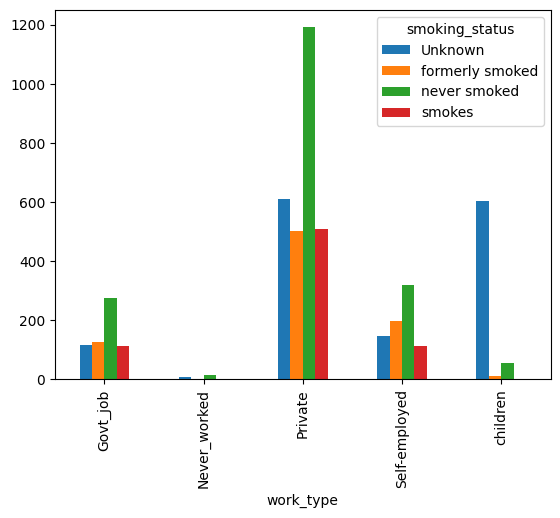

In [19]:
# @title Smoking Status by Work Type

df.groupby(['work_type', 'smoking_status']).size().unstack().plot(kind='bar')

<Axes: xlabel='age'>

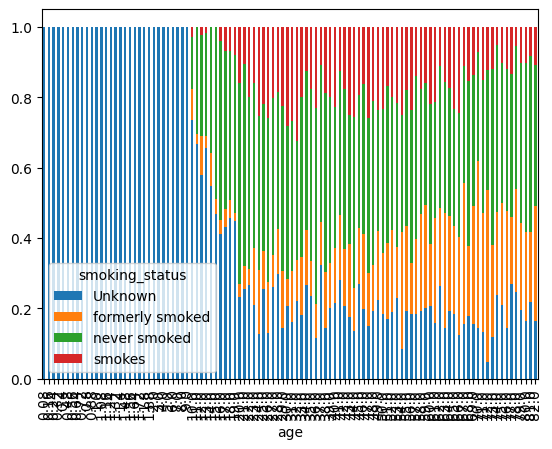

In [18]:
# @title Smoking Status by Age Group

df.groupby('age')['smoking_status'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)

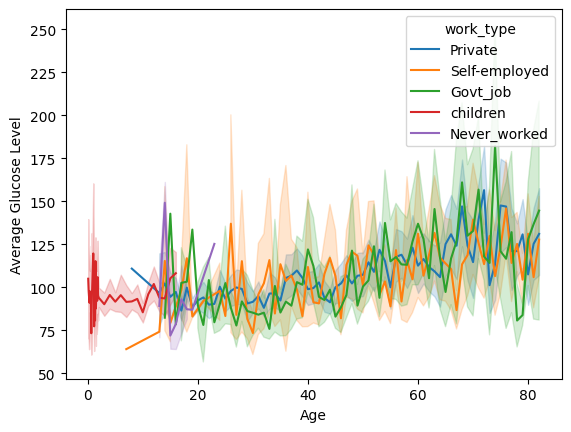

In [9]:
# @title Glucose level by age and work type

import matplotlib.pyplot as plt
sns.lineplot(x='age', y='avg_glucose_level', hue='work_type', data=df)
plt.xlabel('Age')
_ = plt.ylabel('Average Glucose Level')

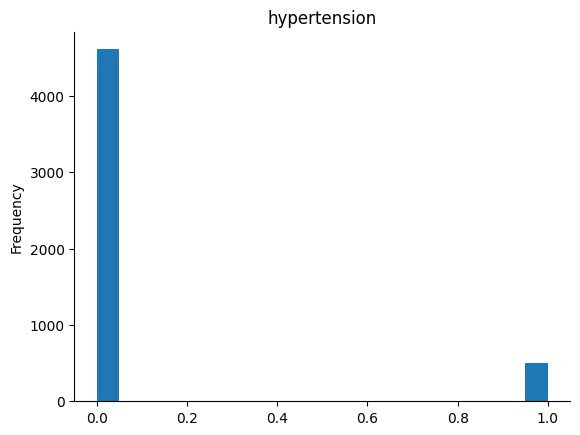

In [8]:
# @title hypertension

from matplotlib import pyplot as plt
df['hypertension'].plot(kind='hist', bins=20, title='hypertension')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [22]:
df['stroke'].replace({
    0: 'The patient did not have a stroke',
    1: 'The patient had a stroke'},
    inplace=True)

In [20]:
df['stroke'].value_counts()

0    4700
1     209
Name: stroke, dtype: int64

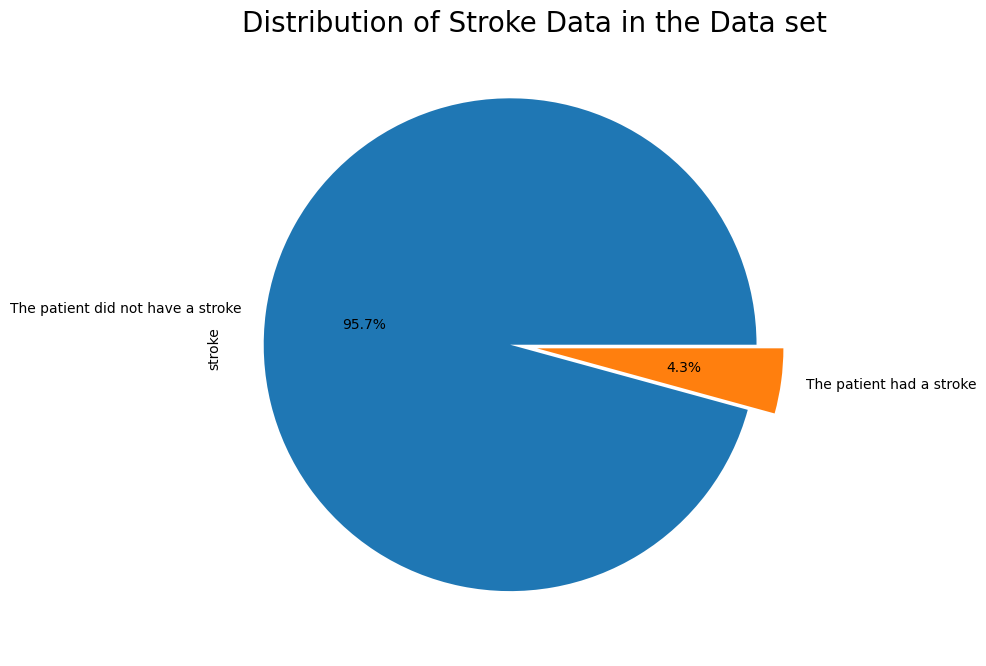

In [23]:
df['stroke'].value_counts().plot.pie(figsize=(12,8), explode=(0.1, 0.01), autopct='%1.1f%%')
plt.title("Distribution of Stroke Data in the Data set", fontsize=20)
plt.show()

<ipython-input-24-dcf8dbd154e8>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df[param_list[:-1]].corr(), annot=True, fmt='.2f')


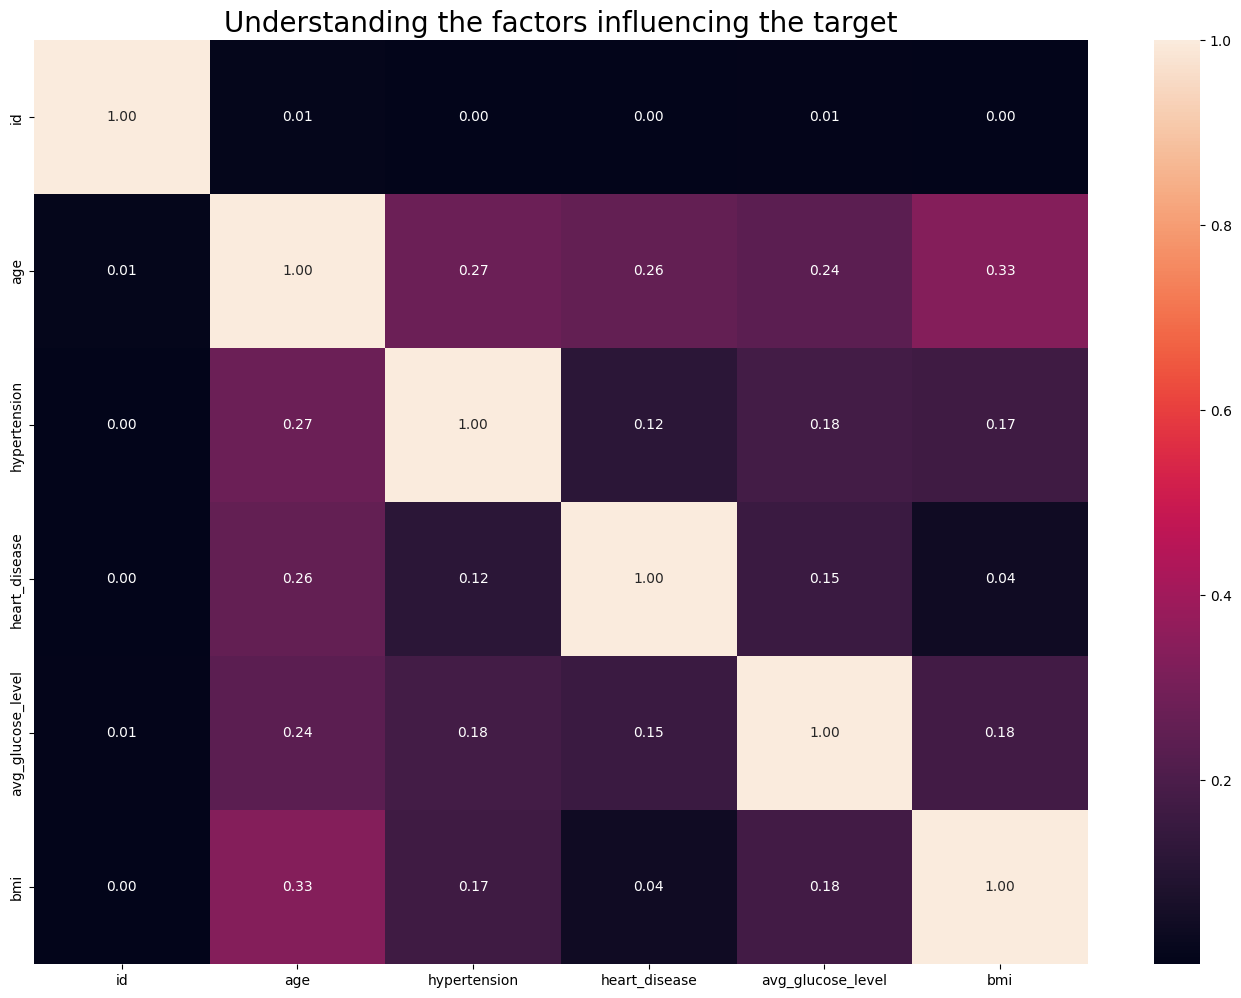

In [24]:
param_list = df.columns
plt.figure(figsize=(17, 12))
sns.heatmap(df[param_list[:-1]].corr(), annot=True, fmt='.2f')
plt.title("Understanding the factors influencing the target", fontsize=20)
plt.show()

<Figure size 2000x1500 with 0 Axes>

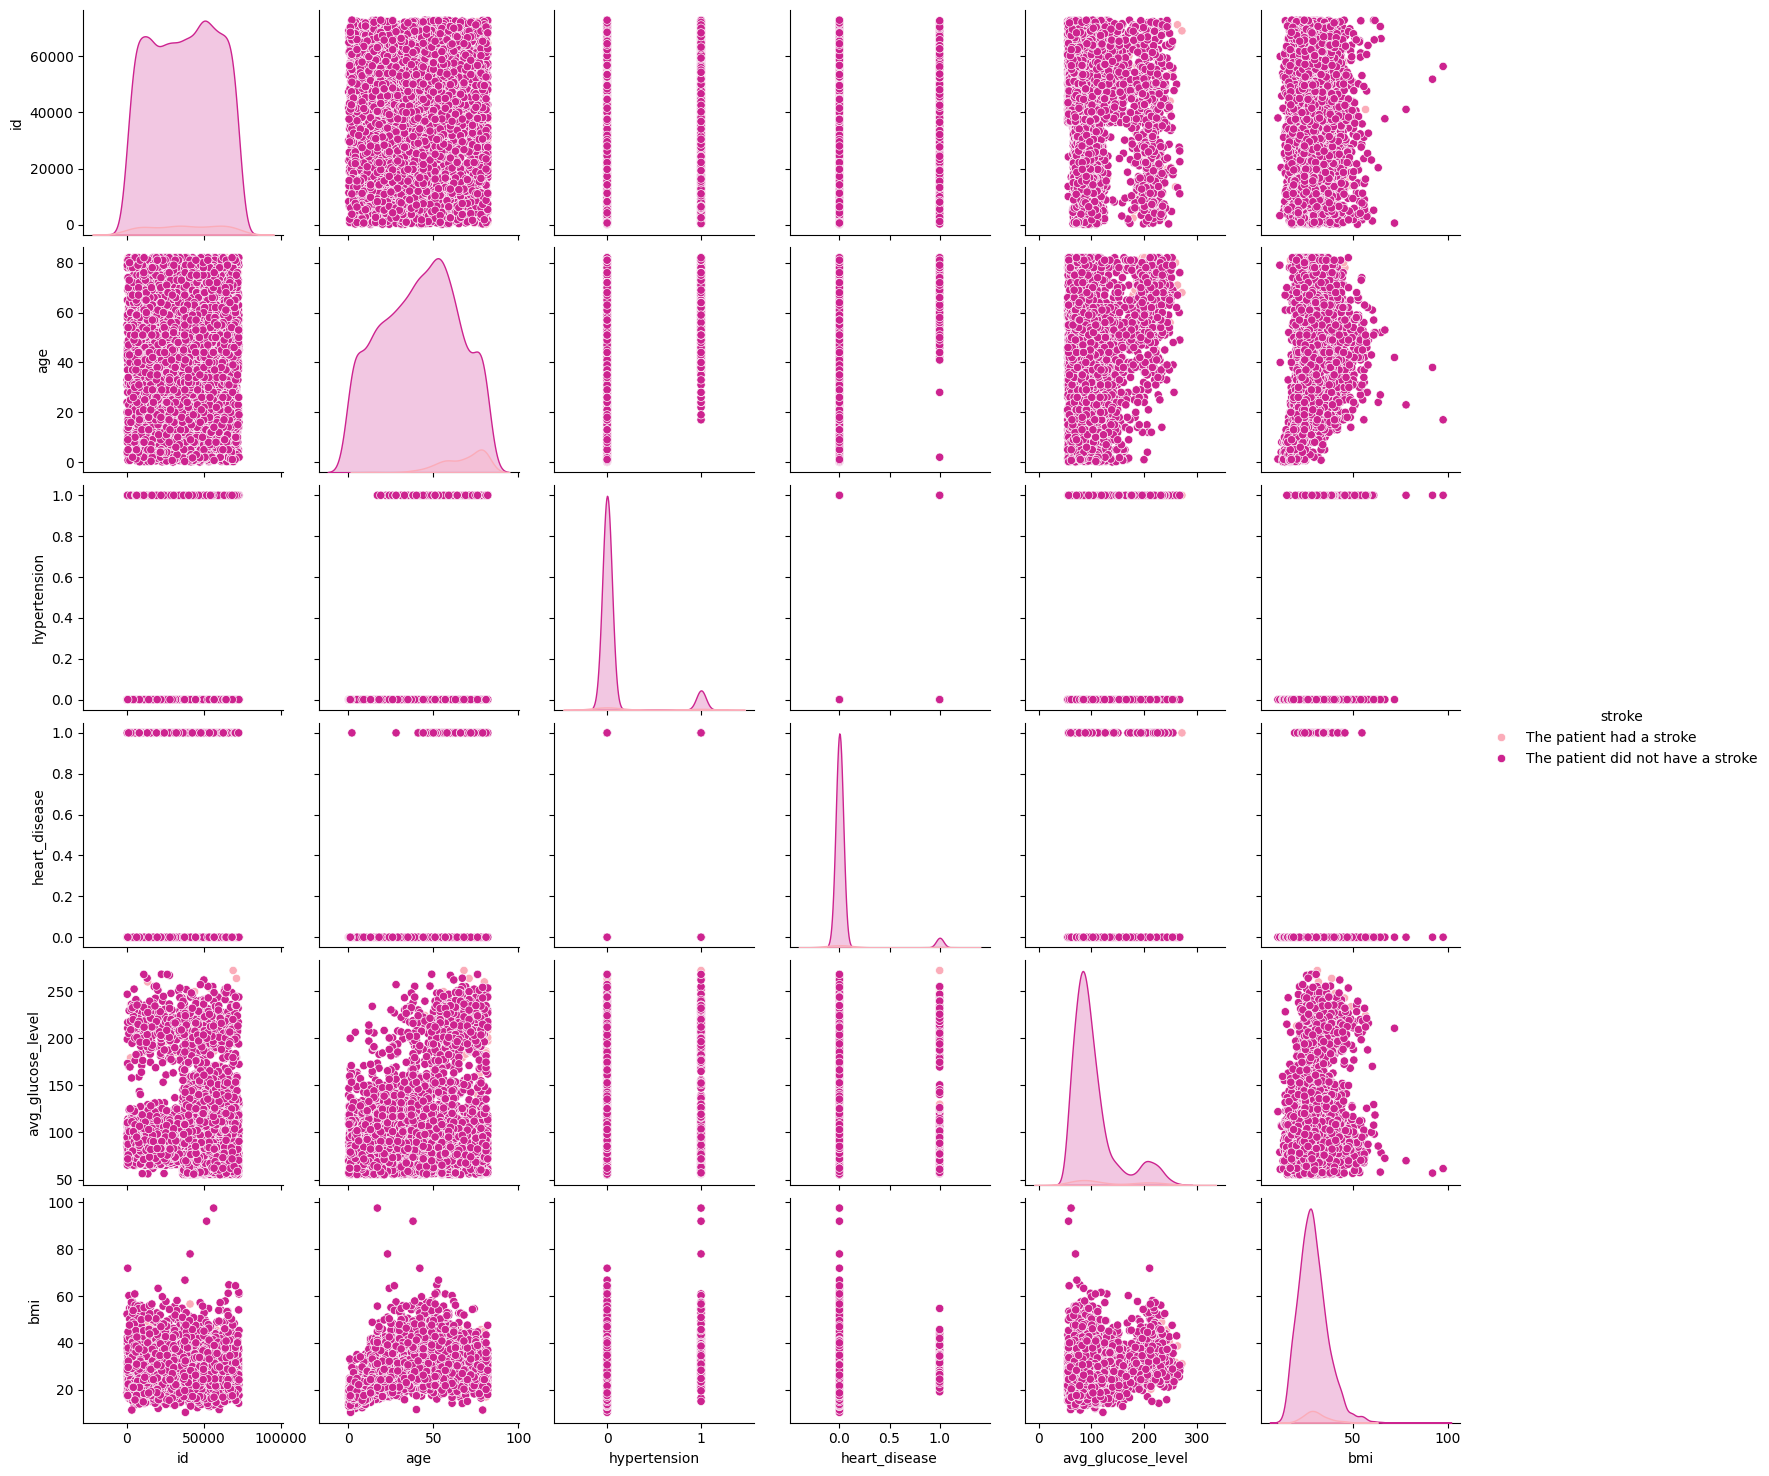

In [25]:
fig = plt.figure(figsize=(20,15), dpi=100)
sns.pairplot(df, hue='stroke', palette='RdPu')

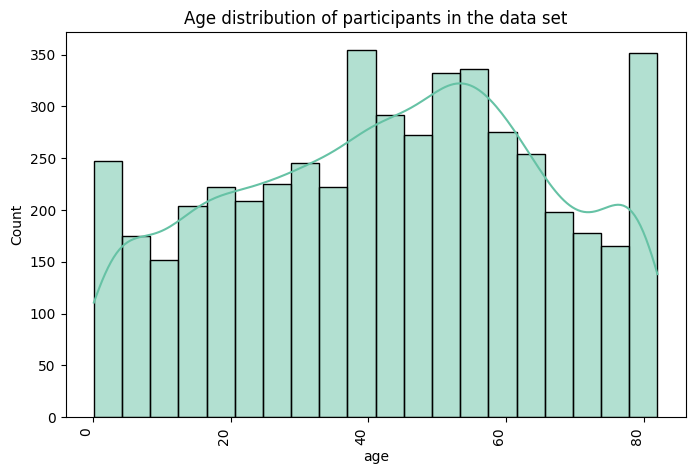

In [30]:
plt.figure(figsize=(8, 5))
palette = sns.color_palette("Set2")
sns.histplot(df['age'], kde=True, color=palette[0])

plt.title(f'Age distribution of participants in the data set')
plt.xticks(rotation=90, ha='right')
plt.show()

Text(0.5, 1.0, 'Exploring Stroke Occurrence Across Different Age Groups')

<Figure size 2000x1000 with 0 Axes>

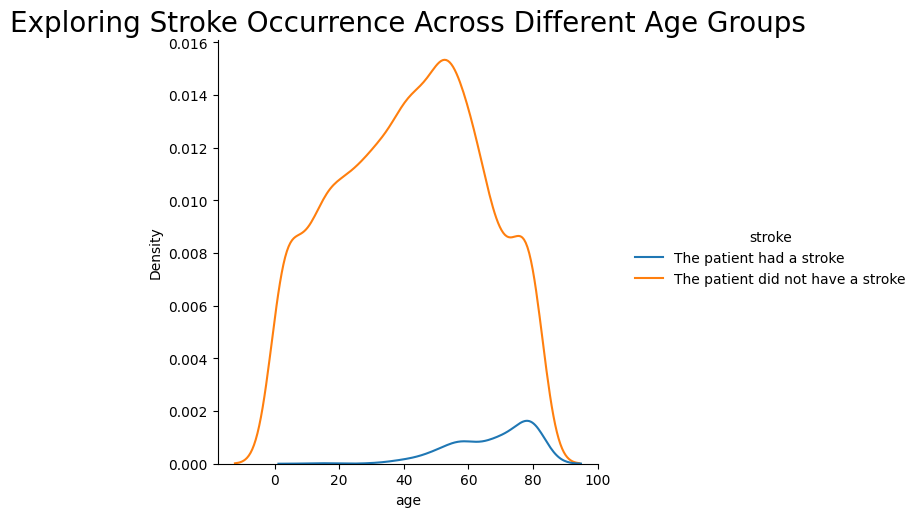

In [31]:
plt.figure(figsize=(20,10))

sns.displot(data=df, x="age", hue="stroke", kind="kde")
plt.title("Exploring Stroke Occurrence Across Different Age Groups",fontsize=20)

<ipython-input-32-cace99935441>:3: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.displot(data=df, x="age", hue="stroke",bins=20, palette=palette)


Text(0.5, 1.0, 'Comparison of age distribution between individuals affected and unaffected by stroke')

<Figure size 2000x1000 with 0 Axes>

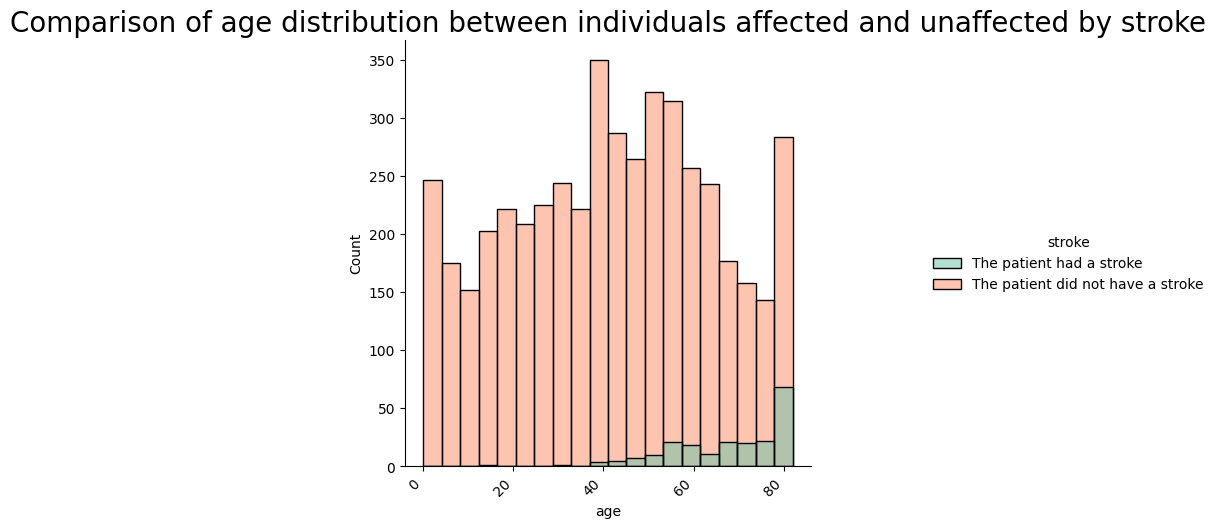

In [32]:
plt.figure(figsize=(20,10))
palette = sns.color_palette("Set2")
sns.displot(data=df, x="age", hue="stroke",bins=20, palette=palette)
plt.xticks(rotation=45, ha="right")
plt.title("Comparison of age distribution between individuals affected and unaffected by stroke",fontsize=20)

<Axes: ylabel='Density'>

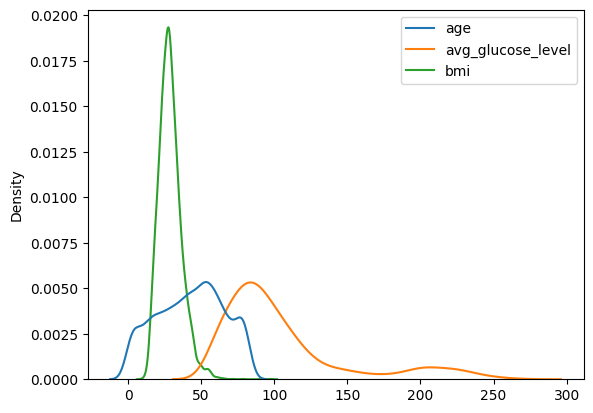

In [33]:
numerical_data = df[['age','avg_glucose_level','bmi']]
sns.kdeplot(data=numerical_data)

<ipython-input-34-a5235c4a559d>:3: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(x = df['hypertension'] , hue=df['stroke'], palette=palette)


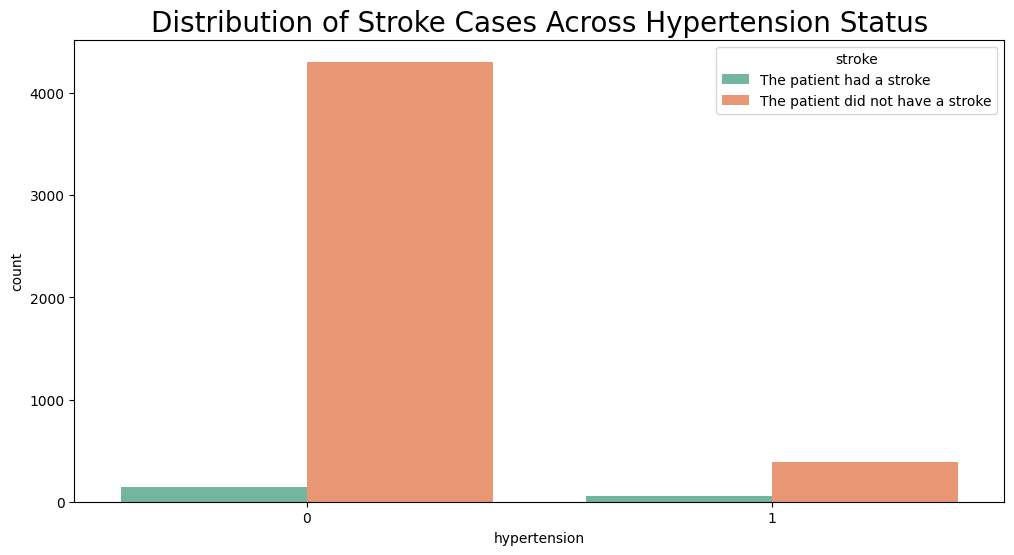

In [34]:
plt.figure(figsize=(12, 6))
palette = sns.color_palette("Set2")
sns.countplot(x = df['hypertension'] , hue=df['stroke'], palette=palette)
plt.title('Distribution of Stroke Cases Across Hypertension Status',fontsize=20)
plt.show()

<ipython-input-35-ae5949ccbe8b>:3: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(x = df['heart_disease'] , hue=df['stroke'], palette=palette)


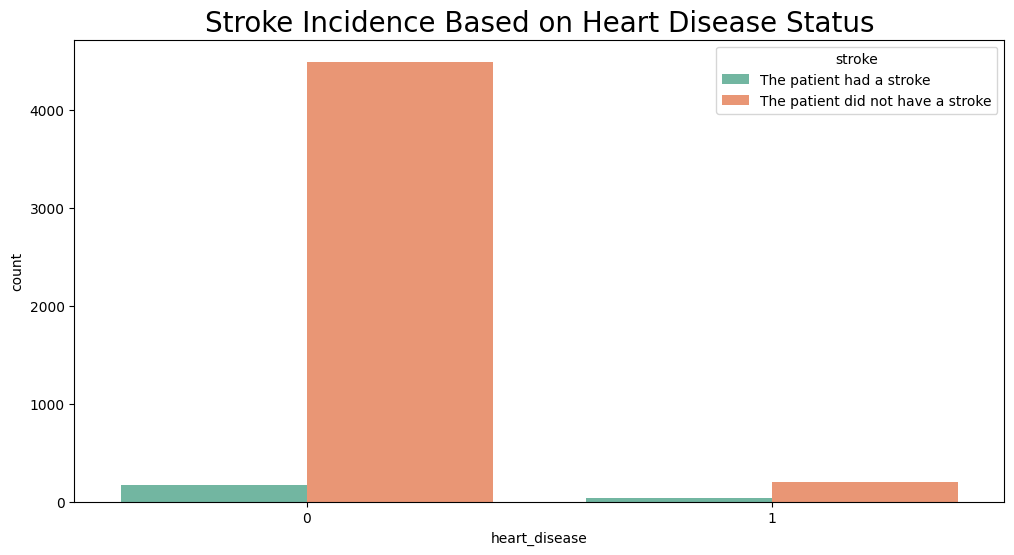

In [35]:
plt.figure(figsize=(12, 6))
palette = sns.color_palette("Set2")
sns.countplot(x = df['heart_disease'] , hue=df['stroke'], palette=palette)
plt.title('Stroke Incidence Based on Heart Disease Status',fontsize=20)
plt.show()

<ipython-input-36-56fe317a8a0b>:3: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.displot(data=df, x="ever_married", hue="stroke",bins=20, palette=palette)


Text(0.5, 1.0, 'Impact of Marital Status on Stroke Incidence')

<Figure size 2000x1000 with 0 Axes>

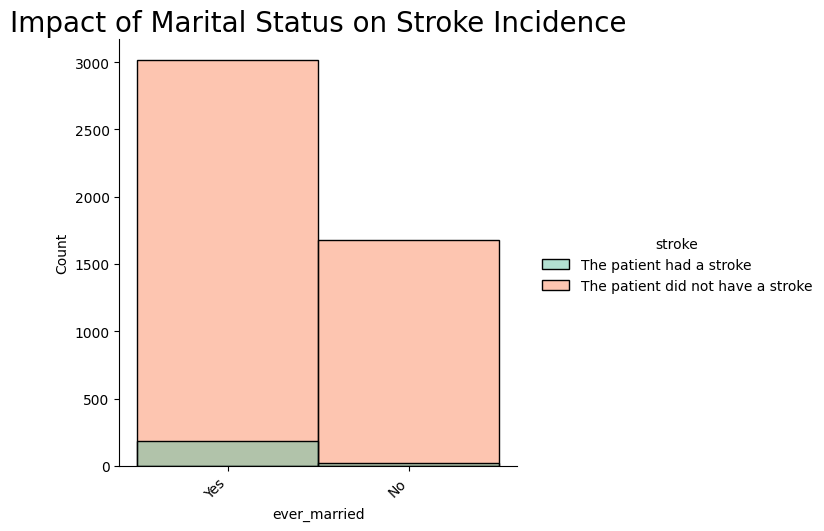

In [36]:
plt.figure(figsize=(20,10))
palette = sns.color_palette("Set2")
sns.displot(data=df, x="ever_married", hue="stroke",bins=20, palette=palette)
plt.xticks(rotation=45, ha="right")
plt.title("Impact of Marital Status on Stroke Incidence",fontsize=20)

Text(0.5, 1.0, 'Analyzing Stroke Incidence with Respect to Average Glucose Levels')

<Figure size 2000x1000 with 0 Axes>

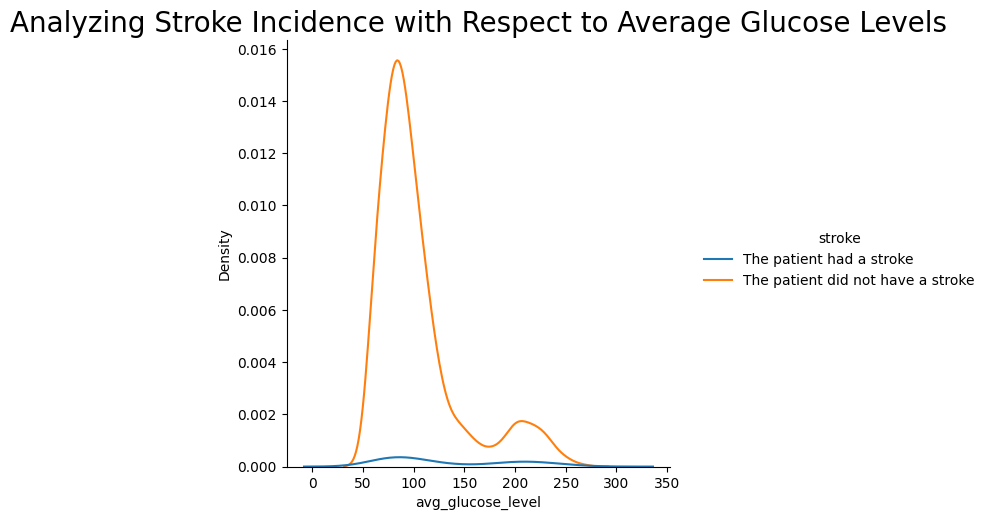

In [37]:
plt.figure(figsize=(20,10))

sns.displot(data=df, x="avg_glucose_level", hue="stroke", kind="kde")
plt.title("Analyzing Stroke Incidence with Respect to Average Glucose Levels",fontsize=20)

<ipython-input-38-b16a21f66129>:3: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.displot(data=df, x="work_type", hue="stroke",bins=20, palette=palette)


Text(0.5, 1.0, 'Impact of Work Type on Stroke Incidence')

<Figure size 1200x800 with 0 Axes>

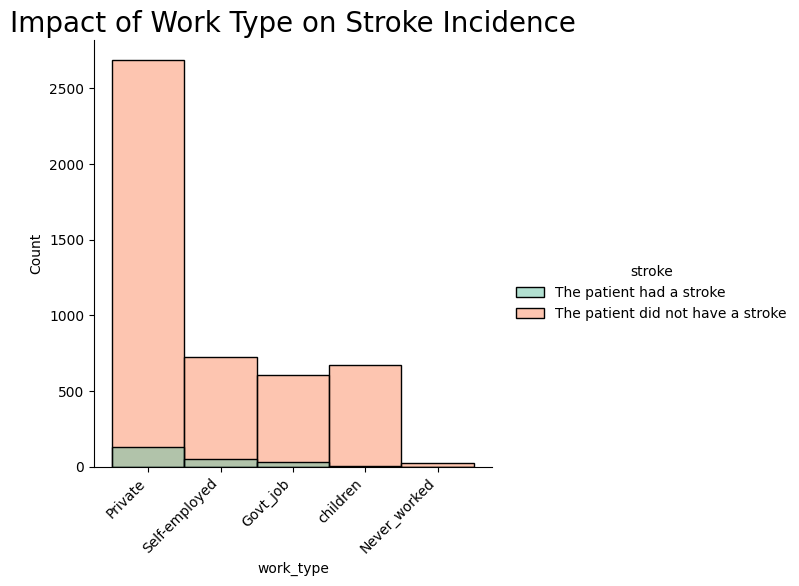

In [38]:
plt.figure(figsize=(12,8))
palette = sns.color_palette("Set2")
sns.displot(data=df, x="work_type", hue="stroke",bins=20, palette=palette)
plt.xticks(rotation=45, ha="right")
plt.title("Impact of Work Type on Stroke Incidence",fontsize=20)

Text(0.5, 1.0, 'Analyzing Stroke Incidence in Relation to BMI')

<Figure size 2000x1000 with 0 Axes>

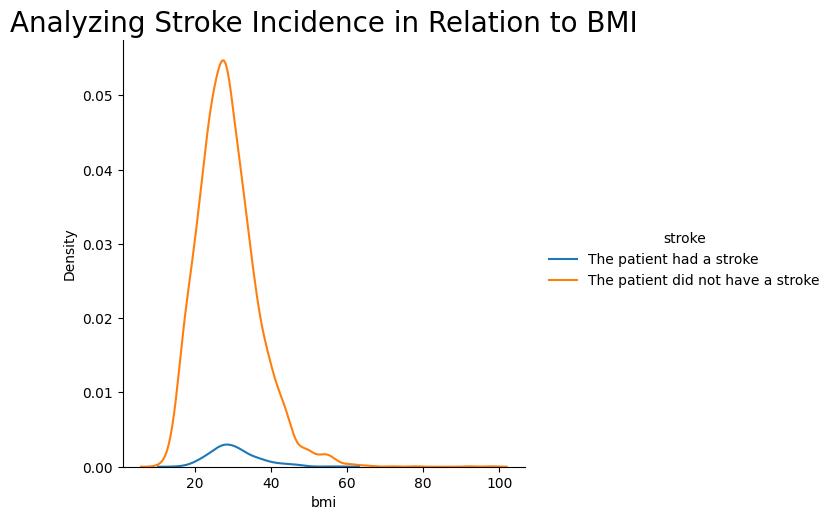

In [39]:
plt.figure(figsize=(20,10))

sns.displot(data=df, x="bmi", hue="stroke", kind="kde")
plt.title("Analyzing Stroke Incidence in Relation to BMI",fontsize=20)

<ipython-input-40-150c02ee4c82>:4: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.histplot(data=df, x="Residence_type", hue="stroke", bins=20, palette=palette, ax=axes[0])
<ipython-input-40-150c02ee4c82>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha="right")
<ipython-input-40-150c02ee4c82>:9: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.histplot(data=df, x="smoking_status", hue="stroke", bins=20, palette=palette, ax=axes[1])
<ipython-input-40-150c02ee4c82>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha="right")


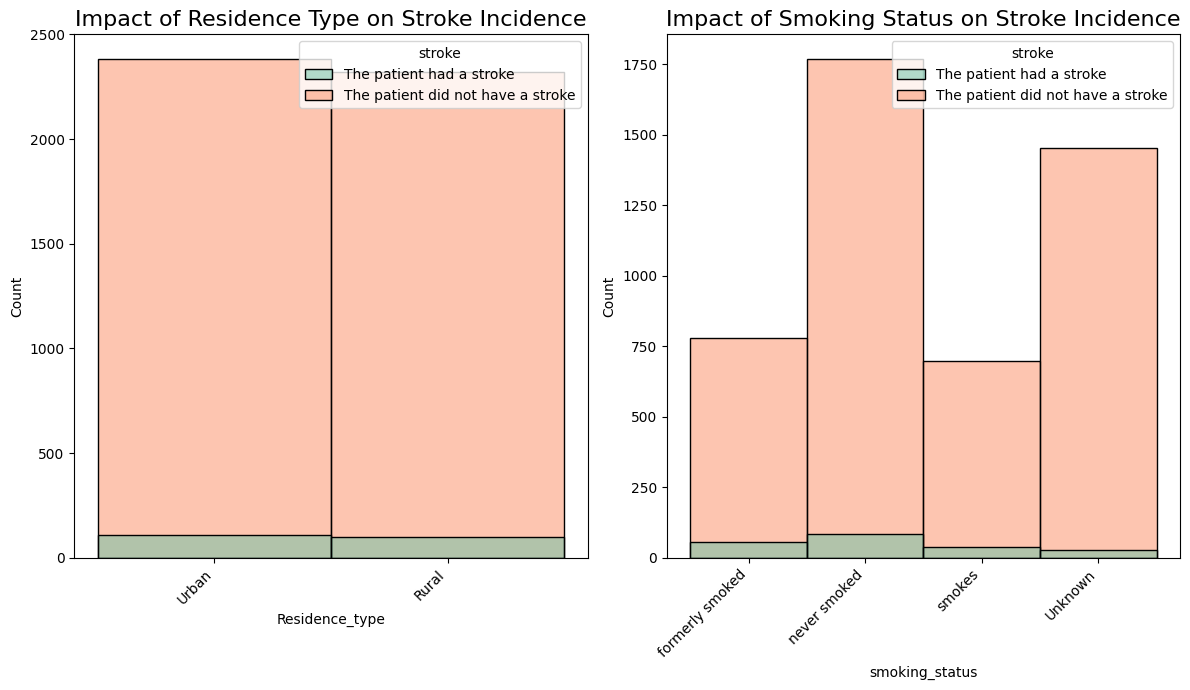

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 7))

palette = sns.color_palette("Set2")
sns.histplot(data=df, x="Residence_type", hue="stroke", bins=20, palette=palette, ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha="right")
axes[0].set_title("Impact of Residence Type on Stroke Incidence", fontsize=16)

palette = sns.color_palette("Set2")
sns.histplot(data=df, x="smoking_status", hue="stroke", bins=20, palette=palette, ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha="right")
axes[1].set_title("Impact of Smoking Status on Stroke Incidence", fontsize=16)

plt.tight_layout()

plt.show()

In [41]:
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

In [42]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,56669,1,81.0,0,0,1,2,1,186.21,29.0,1,1


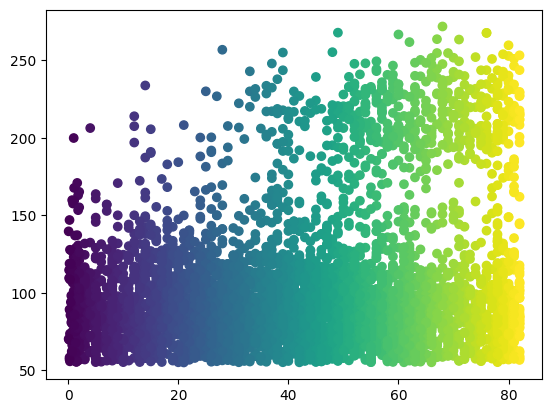

In [43]:
# @title Avg Glucose Level by Age

import matplotlib.pyplot as plt
_ = plt.scatter(df['age'], df['avg_glucose_level'], c=df['age'])

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
for col_name in df.columns:
    if df[col_name].nunique() > 5:
        df[col_name] = scaler.fit_transform(df[[col_name]])

In [45]:
X = df.drop("stroke",axis=1)
y =df['stroke']

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,shuffle=True)

In [47]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train, y_train)

SVC()

In [48]:
y_pred = svm.predict(X_test)

Train Accuracy: 96.01%


Text(0.5, 1.0, 'SVM Confusion Matrix')

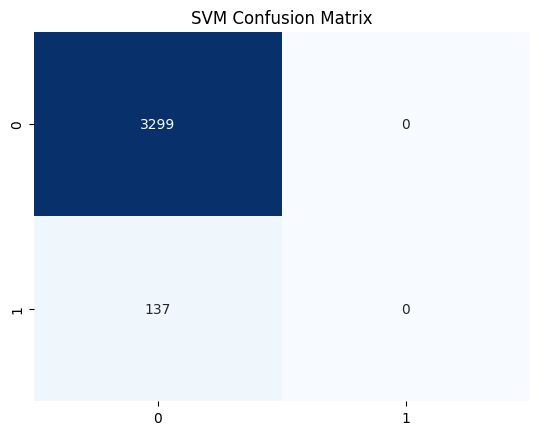

In [49]:
y_pred_train = svm.predict(X_train)
knn_accuracy_train = accuracy_score(y_train, y_pred_train)

cm = confusion_matrix(y_train, y_pred_train)
print(f'Train Accuracy: {round(knn_accuracy_train * 100, 2)}%')

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('SVM Confusion Matrix')

Accuracy for test =  95.11 %


Text(0.5, 1.0, 'svm Confusion Matrix')

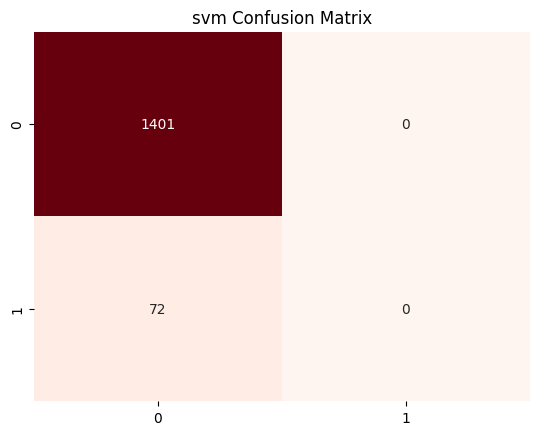

In [52]:
y_pred = svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

lr_test_acc = round(accuracy_score(y_test, y_pred)*100, 2)
print('Accuracy for test = ', lr_test_acc, '%')
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('svm Confusion Matrix')